<div>
<h1>Numeros Complejos</h1> 
</div>

<p>
En este cuaderno, repasamos algunas propiedades de los numeros complejos. En particular, requerimos numeros complejos en vista de la formulacion compleja de la transformada de Fourier, la cual facilita en forma significativa la demostracion de ciertas propiedades algebraicas de la transformada, ver Seccion 2.3.2 de <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015]</a>. 
</p> 

## Definiciones Basicas

Consideremos un numero complejo $c = a + jb$ con parte real $\mathrm{Re}(c) = a$, parte imaginaria $\mathrm{Im}(c) = b$, y unidad imaginaria $j = \sqrt{-1}$. En Python, se requiere escribir un coeficiente que acompañe a `j`. Para especificar un numero complejo, es posible ademas emplear el constructor `complex`.

In [2]:
a = 1.5
b = 0.8
c = a + b*1j
print(c)
c2 = complex(a,b)
print(c2)

(1.5+0.8j)
(1.5+0.8j)


Python ofrece el paquete externo `numpy` para el procesamiento basico de numeros complejos.

In [3]:
import numpy as np

print(np.real(c))
print(np.imag(c))

1.5
0.8


El numero complejo $c = a+jb$ puede graficarse como un punto $(a,b)$ en el sistema de coordenadas cartesianas. Este punto a menudo se visualiza por medio de una flecha con inicio en $(0,0)$ y fin en $(a,b)$.

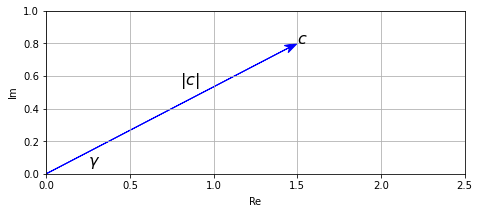

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

def generate_figure(figsize=(2,2),xlim=[0,1],ylim=[0,1]):
    
    """Generate figure for plotting complex numbers"""
    
    plt.figure(figsize=figsize)
    plt.grid()  
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('$\mathrm{Re}$')
    plt.ylabel('$\mathrm{Im}$');

def plot_vector(c,color='k',start=0,linestyle='-'):
    
    """Plot arrow corresponding to difference between two complex numbers"""   
    
    return plt.arrow(np.real(start),np.imag(start),np.real(c),np.imag(c), 
              linestyle=linestyle,head_width=0.05,fc=color,ec=color,
              overhang=0.3,length_includes_head=True)
    
c = 1.5 + 0.8j
generate_figure(figsize=(7.5,3),xlim=[0,2.5],ylim=[0,1])
plot_vector(c,color='b')

plt.text(1.5,0.8,'$c$',size='16')
plt.text(0.8,0.55,'$|c|$',size='16')
plt.text(0.25,0.05,'$\gamma$',size='16');

## Representacion Polar 

El **valor absoluto** (o **modulo**) de un numero complejo $a+jb$ se define

$$|c| := \sqrt{a^2 + b^2}.$$

El **angulo** (en radianes) esta dado por 

$$\gamma := \mathrm{atan2}(b,a).$$

Esta operacion brinda un numero en el intervalo $(-\pi,\pi]$, el cual es posible mapear a $[0,2\pi)$ sumando $\pi$. El *angulo* (en grados) se obtiene por medio de

$$360 \cdot \frac{\gamma}{2\pi}$$

In [5]:
print('Valor absoluto:',np.abs(c))
print('Angulo (en radianes):',np.angle(c))
print('Angulo (en grados):',np.rad2deg(np.angle(c)))
print('Angulo (en grados):',180*np.angle(c)/np.pi )

Valor absoluto: 1.7
Angulo (en radianes): 0.48995732625372834
Angulo (en grados): 28.07248693585296
Angulo (en grados): 28.07248693585296


El numero complejo $c=a+jb$ resulta definido por el par $(|c|,\gamma)$, al cual se designa como **representacion polar** de $c$. Es factible obtener la representacion cartesiana $(a,b)$ a partir de la representacion polar $(|c|,\gamma)$ como sigue:

\begin{eqnarray}
a & = & |c| \cdot \cos(\gamma) \\
b & = & |c| \cdot \sin(\gamma)
\end{eqnarray}

## Operaciones

Siendo dos numeros complejos $c_1=a_1+ib_1$ y $c_2=a_2+ib_2$, la suma

$$
c_1 + c_2 = (a_1 + ib_1) + (a_2 + ib_2) := (a_1 + a_2) + i(b_1 + b_2) 
$$

se logra sumando sus partes reales e imaginarias de manera individual. La representacion geometrica de la suma se consigue a traves de un paralelogramo:

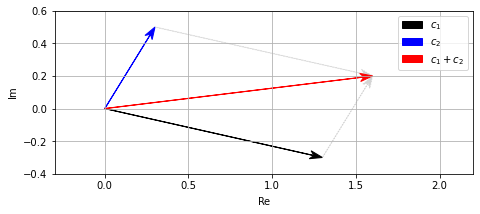

In [6]:
c1 = 1.3 - 0.3j
c2 = 0.3 + 0.5j
c = c1 + c2

generate_figure(figsize=(7.5,3),xlim=[-0.3,2.2],ylim=[-0.4,0.6])
v1 = plot_vector(c1,color='k')
v2 = plot_vector(c2,color='b')
plot_vector(c1,start=c2,linestyle=':',color='lightgray')
plot_vector(c2,start=c1,linestyle=':',color='lightgray')
v3 = plot_vector(c,color='r')

plt.legend([v1,v2,v3],['$c_1$','$c_2$','$c_1+c_2$']);

La multiplicacion de dos numeros $c_1=a_1+ib_1$ y $c_2=a_2+ib_2$ se define por:

$$c = c_1 \cdot c_2 = (a_1 + ib_1) \cdot (a_2 + ib_2) := (a_1a_2 - b_1b_2) + i(a_1b_2 + b_1a_2).$$

Geometricamente, el producto se obtiene sumando angulos y multiplicando valores absolutos. En otros terminos, siendo $(|c_1|,\gamma_1)$ y $(|c_2|,\gamma_2)$ las representaciones polares de $c_1$ y $c_2$, respectivamente, la representacion polar $(|c|,\gamma)$ de $c$ esta dada por:

\begin{eqnarray}
\gamma & = & \gamma_1 + \gamma_2 \\
|c| & = & |c_1| \cdot |c_2|
\end{eqnarray}

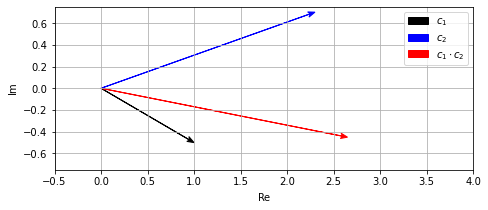

In [7]:
c1 = 1.0 - 0.5j
c2 = 2.3 + 0.7j
c = c1 * c2

generate_figure(figsize=(7.5,3),xlim=[-0.5,4.0],ylim=[-0.75,0.75])
v1 = plot_vector(c1,color='k')
v2 = plot_vector(c2,color='b')
v3 = plot_vector(c,color='r')
plt.legend([v1,v2,v3],['$c_1$','$c_2$','$c_1 \cdot c_2$']);

Dado un numero complejo $c = a + bi$, el **complejo conjugado** se define por $\overline{c} := a - bi$. Su uso permite efectuar calculos de forma mas compacta. Consideremos las siguientes identidades:

\begin{eqnarray}
a & = & \frac{1}{2} (c+\overline{c}) \\
b & = & \frac{1}{2i} (c-\overline{c}) \\
|c|^2 & = & c\cdot \overline{c}\\
\overline{c_1+c_2} & = & \overline{c_1} + \overline{c_2}\\
\overline{c_1\cdot c_2} & = & \overline{c_1} \cdot \overline{c_2}
\end{eqnarray}

Geometricamente, la conjugacion equivale a una reflexion con respecto al eje real.

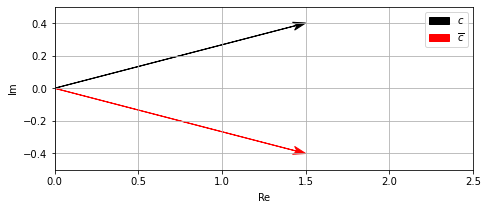

In [8]:
c = 1.5 + 0.4j
c_conj = np.conj(c)

generate_figure(figsize=(7.5,3),xlim=[0,2.5],ylim=[-0.5,0.5])
v1 = plot_vector(c,color='k')
v2 = plot_vector(c_conj,color='r')

plt.legend([v1,v2],['$c$',r'$\overline{c}$']);

Para un numero complejo distinto de cero $c = a + bi$, existe un numero complejo **inverso** $c^{-1}$ con la propiedad $c\cdot c^{-1} = 1$. El inverso esta dado por:

$$c^{-1} := \frac{a}{a^2 + b^2} + i \frac{-b}{a^2 + b^2} = \frac{a}{|c|^2} + i \frac{-b}{|c|^2} = \frac{\overline{c}}{|c|^2}.$$

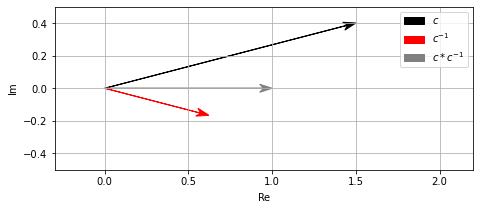

In [9]:
c = 1.5 + 0.4j
c_inv = 1 / c
c_prod = c * c_inv

generate_figure(figsize=(7.5,3),xlim=[-0.3,2.2],ylim=[-0.5,0.5])
v1 = plot_vector(c,color='k')
v2 = plot_vector(c_inv,color='r')
v3 = plot_vector(c_prod,color='gray')

plt.legend([v1,v2,v3],['$c$','$c^{-1}$','$c*c^{-1}$']);

Teniendo en cuenta la inversa, podemos definir la division:
    
$$\frac{c_1}{c_2} = c_1 c_2^{-1} = \frac{a_1 + ib_1}{a_2 + ib_2} := \frac{a_1a_2 + b_1b_2}{a_2^2 + b_2^2} + i\frac{b_1a_2 - a_1b_2}{a_2^2 + b_2^2} =  \frac{c_1\cdot c_2}{|c_2|^2}.$$

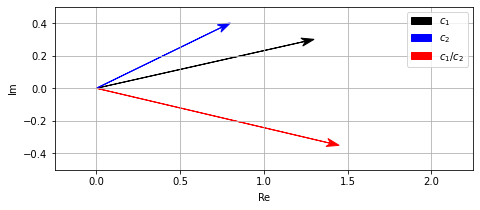

In [10]:
c1 = 1.3 + 0.3j
c2 = 0.8 + 0.4j
c = c1 / c2

generate_figure(figsize=(7.5,3),xlim=[-0.25,2.25],ylim=[-0.5,0.5])
v1 = plot_vector(c1,color='k')
v2 = plot_vector(c2,color='b')
v3 = plot_vector(c,color='r')

plt.legend([v1,v2,v3],['$c_1$','$c_2$','$c_1/c_2$']);

## Grafico de Coordenadas Polares

Finalmente, ilustramos como visualizar vectores complejos en un grafico de coordenadas polares.

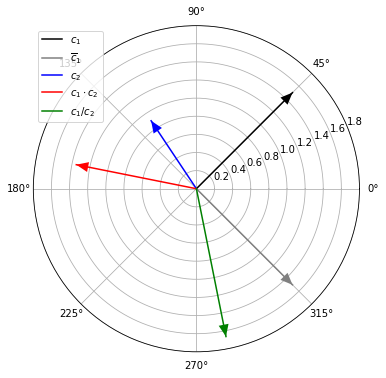

In [11]:
def plot_polar_vector(c,label=None,color=None,start=0,linestyle='-'):
    
    # plot line in polar plane
    line = plt.polar([np.angle(start),np.angle(c)],[np.abs(start),np.abs(c)],
                     label=label,color=color,linestyle=linestyle)
    
    # plot arrow in same color
    this_color = line[0].get_color() if color is None else color
    plt.annotate('', xytext=(np.angle(start),np.abs(start)),xy=(np.angle(c),np.abs(c)),
                 arrowprops=dict(facecolor=this_color,edgecolor='none', 
                 headlength=12,headwidth=10,shrink=1,width=0))

c_abs = 1.5
c_angle = 45 # in degrees
c_angle_rad = np.deg2rad(c_angle) 
a = c_abs*np.cos(c_angle_rad)
b = c_abs*np.sin(c_angle_rad)
c1 = a + b*1j    
c2 = -0.5 + 0.75*1j

plt.figure(figsize=(6,6))
plot_polar_vector(c1,label='$c_1$',color='k')
plot_polar_vector(np.conj(c1),label='$\overline{c}_1$',color='gray')
plot_polar_vector(c2,label='$c_2$',color='b')
plot_polar_vector(c1*c2,label='$c_1\cdot c_2$',color='r')
plot_polar_vector(c1/c2,label='$c_1/c_2$',color='g')

plt.ylim([0,1.8]);
plt.legend();

In [1]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())